In [138]:
%load_ext autoreload
%autoreload

import common
from common import *
from sympy import init_printing
import sympy as sp

init_printing()
pp_euler = pp(euler_error)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:
def get_pos(results):
    for result in results:
        w = result['w']
        yield {'1x': w[0], '1y': w[2], '2x': w[4], '2y': w[6], '3x': w[8], '3y': w[10]}
        
pp_pos = pp(get_pos)

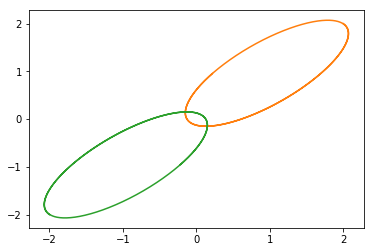

In [142]:
# CP 6.3 10

from sympy.abc import t
from itertools import product
from operator import concat
from functools import reduce

# m1, m2, m3, g = sp.symbols("m_1 m_2 m_3 g")
m1, m2, m3, g = 0.3, 0.03, 0.03, 9.81


def F(t, y):
    return body3(y, m1, m2, m3, g)


# y = body3_y()
# display(F(t, y))

iv = body3_iv((0, 0), (0, 0), (2, 2), (0.2, -0.2), (-2, -2), (-0.2, 0.2))

r = euler(F, h=0.005, t=10, iv=(0, iv), method=euler_rk4)
positions = get_pos(r)
common.plot_gen(positions, y_keys=('1y', '2y', '3y'), x_keys=['1x', '2x', '3x'])

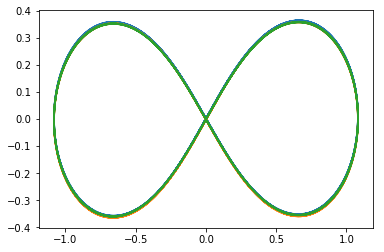

In [141]:
# 6.3 CP 11

from sympy.abc import t
from itertools import product
from operator import concat
from functools import reduce

m1, m2, m3, g = 1, 1, 1, 1


def F(t, y):
    return body3(y, m1, m2, m3, g)


iv = body3_iv((-0.970, 0.243), (-0.466, -0.433), 
              (0.970, -0.243), (-0.466, -0.433),
              (0, 0), (2*0.466, 2*0.433))

r = euler(F, h=0.01, t=50, iv=(0, iv), method=euler_rk4)
positions = get_pos(r)
common.plot_gen(positions, y_keys=('1y', '2y', '3y'), x_keys=['1x', '2x', '3x'])


# Deloppg b
# Ja, hvis man gjør en liten endring i d/dx(x_3) så vil det få store utslag for banen, dvs de går fort ut av banene sin


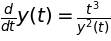

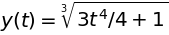

i   | t    | w                  | error                 
----+------+--------------------+-----------------------
0   | 0    | 1                  | 0                     
1   | 0.01 | 1.0000000025       | 0                     
2   | 0.02 | 1.0000000399999984 | 0                     
3   | 0.03 | 1.000000202499959  | 0                     
4   | 0.04 | 1.0000006399995904 | 0                     
5   | 0.05 | 1.0000015624975587 | 0                     
6   | 0.06 | 1.0000032399895027 | 2.220446049250313e-16 
7   | 0.07 | 1.0000060024639708 | 4.440892098500626e-16 
8   | 0.08 | 1.000010239895145  | 6.661338147750939e-16 
9   | 0.09 | 1.0000164022309666 | 1.1102230246251565e-15
10  | 0.1  | 1.0000249993750279 | 1.7763568394002505e-15
11  | 0.11 | 1.0000366011603412 | 2.4424906541753444e-15
12  | 0.12 | 1.00005183731285   | 3.3306690738754696e-15
13  | 0.13 | 1.0000713974022941 | 4.440892098500626e-15 
14  | 0.14 | 1.0000960307778002 | 5.551115123125783e-15 
15  | 0.15 | 1.0001265464853186

In [11]:
# 6.4 CP 1

# f = lambda t, y: t
# f = lambda t, y: (t**2)*y
# f = lambda t, y: 2*(t+1)*y
# f = lambda t, y: 5*(t**4)*y
# f = lambda t, y: 1/(y**2)
f = lambda t, y: (t**3)/(y**2)

pp_euler(f, h=0.01, t=1, iv=(0, 1), method=euler_midpoint)

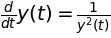

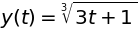

i  | t   | w                  | error              | exact             
---+-----+--------------------+--------------------+-------------------
0  | 0   | 1                  | 0                  | 1                 
1  | 10  | 5.351128768333145  | 2.209748115941752  | 3.1413806523913927
2  | 20  | 5.679761990797851  | 1.7432648076956783 | 3.9364971831021727
3  | 30  | 5.974217473431206  | 1.476276028155791  | 4.497941445275415 
4  | 40  | 6.242197895166688  | 1.296110451917988  | 4.9460874432487   
5  | 50  | 6.488955362861249  | 1.1638813412462632 | 5.325074021614986 
6  | 60  | 6.718250366413511  | 1.0615975405906015 | 5.65665282582291  
7  | 70  | 6.93287874184438   | 0.979536928705329  | 5.953341813139051 
8  | 80  | 7.1349823312975955 | 0.9118980780915376 | 6.223084253206058 
9  | 90  | 7.326242507553781  | 0.8549688805934164 | 6.471273626960365 
10 | 100 | 7.50800621521496   | 0.8062468198368906 | 6.701759395378069 


In [57]:
%matplotlib inline
# 6.4 CP 3

# f = lambda t, y: t
# f = lambda t, y: (t**2)*y
# f = lambda t, y: 2*(t+1)*y
# f = lambda t, y: 5*(t**4)*y
f = lambda t, y: 1/(y**2)
# f = lambda t, y: (t**3)/(y**2)

# pp_euler(f, h=10, t=100, iv=(0, 1), method=euler_rk4)

common.plot(euler_error(f, h=1, t=40, iv=(0, 1), method=euler_rk4), estimate_key='w', x_key='t')

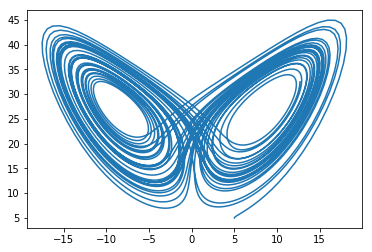

In [131]:
# 6.4 CP 11

from itertools import islice

s, r, b = 10, 28, 8/3

def F(t, y): 
    return sp.Matrix([
        [-s*y[0] + s*y[1]],
        [-y[0]*y[2] + r*y[0] - y[1]],
        [y[0]*y[1] - b*y[2]]
    ])

iv = sp.Matrix([[5], [5], [5]])

results = euler(F, h=0.01, t=40, iv=(0, iv), method=euler_rk4)

def transform(results):
    for result in results:
        yield {'x': result['w'][0], 'z': result['w'][2]}
        
common.plot_gen(transform(results), y_keys=('z'), x_keys=('x'))

# pp_table(group_dicts(islice(results, 10)))